### Calibrate Backscatter data on ship

The ship based backscatter from I6S is not same units as floats. 

In [8]:
import numpy as np
import gsw
import xarray as xr
import matplotlib.pyplot as plt

In [3]:
import os

In [6]:
from scipy.signal import medfilt
from scipy.ndimage import  minimum_filter1d, maximum_filter1d

In [4]:
# Cruise data 
data_folder = data_dir + "data/raw/cruise/325020190403_nc_ctd/"
file_names = sorted(os.listdir(data_folder))

In [5]:
cruise_dic = {}
for count, fil in enumerate(file_names):
    cruise_dic[count] = xr.open_dataset(data_folder + fil)

In [57]:
cruise_dic[10]

<xarray.Dataset>
Dimensions:          (latitude: 1, longitude: 1, pressure: 2073, time: 1)
Coordinates:
  * pressure         (pressure) float64 0.0 2.0 4.0 ... 4.142e+03 4.144e+03
  * time             (time) datetime64[ns] 2019-04-17T21:49:00
  * latitude         (latitude) float32 -66.99944
  * longitude        (longitude) float32 30.0003
Data variables:
    pressure_QC      (pressure) int16 ...
    temperature      (pressure) float64 ...
    temperature_QC   (pressure) int16 ...
    salinity         (pressure) float64 ...
    salinity_QC      (pressure) int16 ...
    oxygen           (pressure) float64 ...
    oxygen_QC        (pressure) int16 ...
    CTDXMISS         (pressure) float64 ...
    CTDXMISS_QC      (pressure) int16 ...
    CTDFLUOR         (pressure) float64 ...
    CTDFLUOR_QC      (pressure) int16 ...
    CTDBBP700RAW     (pressure) float64 0.2261 0.2261 0.2274 ... 0.1442 0.1452
    CTDBBP700RAW_QC  (pressure) int16 ...
    woce_date        (time) int32 ...
    woce_time        (time) int16 ...
    station          |S40 ...
    cast             |S40 ...
Attributes:
    EXPOCODE:                   325020190403
    Conventions:                COARDS/WOCE
    WOCE_VERSION:               3.0
    WOCE_ID:                    I06S
    DATA_TYPE:                  WOCE CTD
    STATION_NUMBER:             11
    CAST_NUMBER:                1
    BOTTOM_DEPTH_METERS:        4182
    Creation_Time:              2019-06-28T16:39:30.204264Z
    ORIGINAL_HEADER:            CTD,20190628CCHSIO\n# SHIP: Thomas G. Thompso...
    WOCE_CTD_FLAG_DESCRIPTION:  ::1 = Not calibrated:2 = Acceptable measureme...

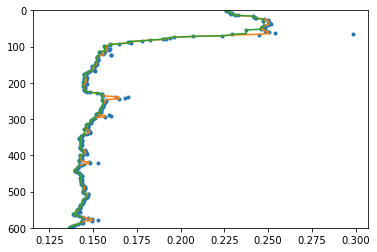

In [9]:
plt.plot(cruise_dic[10].CTDBBP700RAW, cruise_dic[10].pressure, '.')
plt.plot(medfilt(cruise_dic[10].CTDBBP700RAW,5), cruise_dic[10].pressure)
plt.plot(maximum_filter1d(minimum_filter1d(cruise_dic[10].CTDBBP700RAW,7),7), cruise_dic[10].pressure)
plt.ylim(0,600)

plt.gca().invert_yaxis()

In [16]:
# Float data 
HRdir = "/Users/dhruvbalwada/OneDrive/sogos_data/data/raw/SOCCOM/manual_download/SOCCOM_HRQC_LIAR_netcdf_20191201/"
LRdir = "/Users/dhruvbalwada/OneDrive/sogos_data/data/raw/SOCCOM/manual_download/SOCCOM_LRQC_LIAR_netcdf_20191201/"

float_dic_HR = xr.open_dataset(HRdir + str(12888) + "SOOCN_HRQC.nc")
float_dic_LR = xr.open_dataset(LRdir + str(12888) + "SOOCNQC.nc")

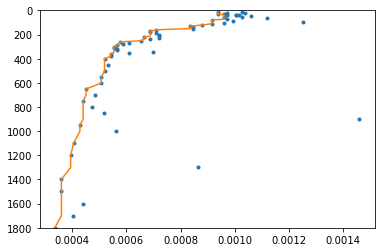

In [25]:
plt.plot(float_dic_LR.b_bp700.isel(N_PROF=0), float_dic_LR.Pressure.isel(N_PROF=0),'.')
plt.plot(maximum_filter1d(minimum_filter1d(float_dic_LR.b_bp700.isel(N_PROF=0),7),7),
         float_dic_LR.Pressure.isel(N_PROF=0))
plt.ylim(0,1800)

plt.gca().invert_yaxis()

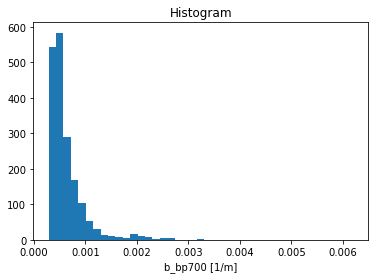

In [30]:
float_dic_LR.b_bp700.plot.hist(bins=41);

In [42]:
lat = [cruise_dic[i].latitude.values for i in cruise_dic.keys() ]
lon = [cruise_dic[i].longitude.values for i in cruise_dic.keys() ]

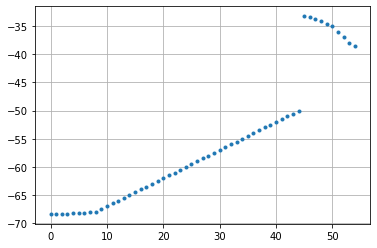

In [49]:
plt.plot(lat,'.')
plt.grid()

In [93]:
lat[40], lat[42]

(array([-51.99956], dtype=float32), array([-51.0003], dtype=float32))

In [97]:
bbp = [cruise_dic[i].CTDBBP700RAW.values for i in range(40,43)]
pres = [cruise_dic[i].pressure.values for i in range(40,43)]

In [98]:
pres

[array([0.000e+00, 2.000e+00, 4.000e+00, ..., 4.558e+03, 4.560e+03,
        4.562e+03]),
 array([0.000e+00, 2.000e+00, 4.000e+00, ..., 4.318e+03, 4.320e+03,
        4.322e+03]),
 array([0.000e+00, 2.000e+00, 4.000e+00, ..., 5.836e+03, 5.838e+03,
        5.840e+03])]

In [99]:
pres_upper = np.array([])
bbp_upper = np.array([])
for i in range(len(bbp)): 
    pres_upper = np.append(pres_upper, pres[i][pres[i]<600])
    bbp_upper = np.append(bbp_upper, bbp[i][pres[i]<600])

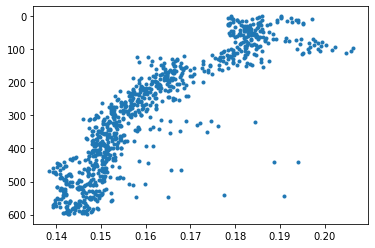

In [100]:
plt.plot(bbp_upper, pres_upper,'.')
plt.gca().invert_yaxis()

In [101]:
float_bbp_upper = float_dic_LR.b_bp700.where(float_dic_LR.Pressure<600, drop=True).isel(N_PROF=slice(0,4))
float_pres_upper = float_dic_LR.Pressure.where(float_dic_LR.Pressure<600, drop=True).isel(N_PROF=slice(0,4))

(0.0004, 0.0012)

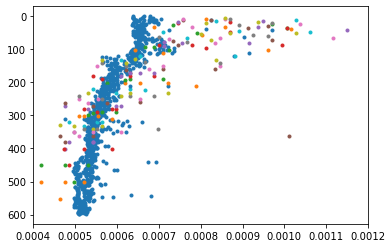

In [117]:
plt.plot(bbp_upper/280, pres_upper,'.')

plt.plot(float_bbp_upper.values, float_pres_upper.values,'.');
plt.gca().invert_yaxis()
plt.xlim([0.0004, 0.0012])

In [118]:
float_dic_LR.b_bp700.attrs

{'units': '1/m'}